### Titanic case study
In this case, I'm trying to explore the info of survivor in titanic.

The question is What kind of people in titanic are finally still alive? we can retrieve the result by decomposing the dataset by each column

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#read the csv data
titanic = pd.read_csv('titanic-data.csv')

#total number of people in titanic
print "# of people in titanic:", len(titanic)
#basic data of titanic
print titanic.head(3)
#the summary of titanic
print titanic.describe()

# of people in titanic: 891
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.00

However there are some missing data in each column. 
For data completeness, I only drop the missing value of specified independent variable when I want to explore it, because dropping all missing value will decrease # of data, and the sample size n will decrease. 
let us see the correlation of survived between each numerical independent variable.

In [4]:

print "corr of Survived with Pclass:",titanic['Survived'].corr(titanic['Pclass'])
print "corr of Survived with Age:",titanic['Survived'].corr(titanic['Age'])
print "corr of Survived with SibSp:",titanic['Survived'].corr(titanic['SibSp'])
print "corr of Survived with Parch:",titanic['Survived'].corr(titanic['Parch'])
print "corr of Survived with Fare:",titanic['Survived'].corr(titanic['Fare'])


corr of Survived with Pclass: -0.338481035961
corr of Survived with Age: -0.0772210945722
corr of Survived with SibSp: -0.0353224988857
corr of Survived with Parch: 0.0816294070835
corr of Survived with Fare: 0.257306522385


Correlation imply some useful clues in the beginning. After correlation analysis with dependent variable 'Survived' with other numerical independent vairable. 'Pclase' and 'Fare' are have strong relationship than other variables
For convenience, I want to split the original data to two - death and survivor - according to the value of survivede equals to 0 or not.

In [4]:
#filter out survivor(survived == 1) and death(survived == 0)
death = titanic[titanic['Survived'] == 0]
survivor = titanic[titanic['Survived'] > 0]
print "# of survival:",len(survivor)
print "# of death:",len(death)

# of survival: 342
# of death: 549


### Explore independent variable 'PClass'

First, I want to make the pie chart to understand the percentage in each PClass with death and survived.

make sure the data is drop off NaN vaule in column 'Pclass', I will print out the length of data

In [11]:
print "# of survival:",len(survivor)
print "# of death:",len(death)

print "# of survival after drop NaN:",len(survivor['Pclass'].dropna())
print "# of death after drop NaN:",len(death['Pclass'].dropna())



# of survival: 342
# of death: 549
# of survival after drop NaN: 342
# of death after drop NaN: 549


It seems there are no NaN vaule in colmne Pclass in whole dataset, so there are no requirement to do data cleaning. Next, Here are the pie chart of Pclass with people who survived

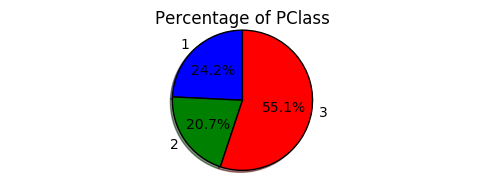

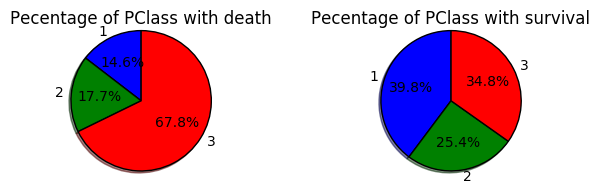

In [25]:
# GridSpec for put two pie chart in same grid
from matplotlib.gridspec import GridSpec

#count the number of PClass in each category
originalPclass = [len(titanic[titanic['Pclass'] == 1]), 
                 len(titanic[titanic['Pclass'] == 2]),
                 len(titanic[titanic['Pclass'] == 3])]

deathPclass  = [len(death[death['Pclass'] == 1]), 
                 len(death[death['Pclass'] == 2]),
                 len(death[death['Pclass'] == 3])]

survivePclass = [len(survivor[survivor['Pclass'] == 1]), 
                 len(survivor[survivor['Pclass'] == 2]),
                 len(survivor[survivor['Pclass'] == 3])]
# sperate graph in to 3 block
the_grid = GridSpec(2,2, wspace = 1)

#plot the first pie chart with titanic
plt.subplot(the_grid[0, :], aspect='auto')
plt.pie(originalPclass,  labels=['1','2','3'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Percentage of PClass")
plt.axis('equal')
plt.show()

#plot the pie chart with death
plt.subplot(the_grid[1, 0], aspect=2)
plt.pie(deathPclass,  labels=['1','2','3'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Pecentage of PClass with death")
plt.axis('equal')

#plot the pie chart with survivor
plt.subplot(the_grid[1, 1], aspect=2)
plt.pie(survivePclass,  labels=['1','2','3'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Pecentage of PClass with survival")
plt.axis('equal')
plt.show()

According to the pie chart above
The percentages of Pclass in titanic are 24.2%, 20.1%, and 55.1% in Pclass 1, 2 and 3.
The percentages of Pclass in titanic are 14.6%, 17.7%, and 67.8% in Pclass 1, 2 and 3.
The percentages of Pclass in titanic are 39.8%, 25.4%, and 34.8% in Pclass 1, 2 and 3.

Comparing to orignal ratio in titanic, We can conclude that more people with Pclass 3 are dead. because the percentage with pclass equals to 3 in death is higher than original one. we know people with pclass 3 has less chance to survive. Vise versa, We also find people with pclass equals to 1 and 2 have more opportunity to survive.

### Explore independent variable 'Fare'
In this part, We want to explore the relationship between Fare and Survived, but first we have to make sure the data cleaness in column 'Fare'. 

In [26]:
print "# of survival:",len(survivor)
print "# of death:",len(death)

print "# of survival after drop NaN:",len(survivor['Fare'].dropna())
print "# of death after drop NaN:",len(death['Fare'].dropna())


# of survival: 342
# of death: 549
# of survival after drop NaN: 342
# of death after drop NaN: 549


It also seem there are no missing value in column 'Fare', so we can start drawing histogram to observe the distribution of 'Fare' variable with death and survivor.

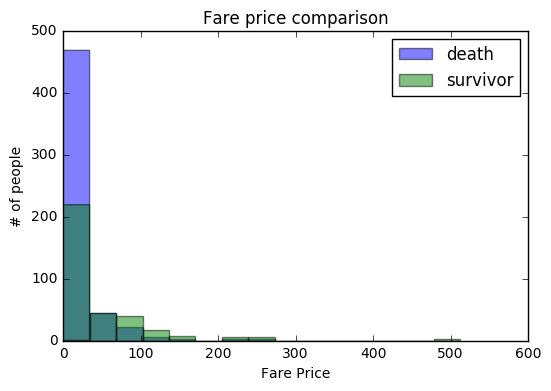

In [5]:

#setting the number of bins in histograma
bins=np.histogram(np.hstack((death['Fare'], survivor['Fare'])), bins=15)[1]

#plotting histogram
plt.hist(death['Fare'], bins, alpha = 0.5, label = 'death')
plt.hist(survivor['Fare'],  bins,alpha = 0.5, label = 'survivor')
plt.title('Fare price comparison')
plt.xlabel('Fare Price')
plt.ylabel('# of people')
plt.legend(loc = 'upper right')
plt.show()

The graph is concerened about distribution of fare with people who survive and who is dead
It shows more people who is dead bought cheaper fare than survivor. Especially over when the fare is lower than $33. the number of dead and suvivor is over 200 peoples. 

To show the distribution and the statistic of distribution clearly, here is the boxplot of death and survivor.

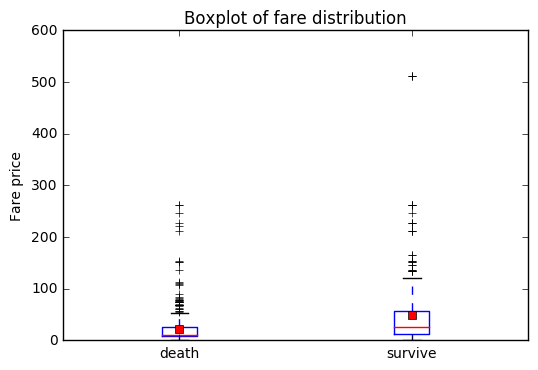

Summary of death['Fare']: 
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64 

Summary of survivor['Fare']: 
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


In [31]:
data = [death['Fare'], survivor['Fare']]
plt.title("Boxplot of fare distribution")
plt.boxplot(data, labels = ['death', 'survive'], showmeans = True)
plt.ylabel('Fare price')
plt.show()
print "Summary of death['Fare']: "
print death['Fare'].describe() , "\n"
print "Summary of survivor['Fare']: "
print survivor['Fare'].describe()

### Explore the independent variable Age

We change the independet variable to Age and also check the distribution of Age with death and survivor.
Similar to previous part, let start from checking the data completeness

In [35]:
print "# of death:",len(death)
print "# of survival:",len(survivor)

#after filing out the NaN Value
print "# of death after drop NaN in death:",len(death['Age'].dropna())
print "# of death after drop NaN in survivor:",len(survivor['Age'].dropna())

#caculate the difference
print "difference after cleaning in death :",len(death) - len(death['Age'].dropna()) 
print "difference after cleaning in survivor:",len(survivor) - len(survivor['Age'].dropna())

# of death: 549
# of survival: 342
# of death after drop NaN in death: 424
# of death after drop NaN in survivor: 290
difference after cleaning in death : 125
difference after cleaning in survivor: 52


After data cleaning, we filter out 125 NaN in dataset death and 52 NaN in dataset survivor, we use the cleaned dataset to plot the boxplot to observed the distribution of Age.

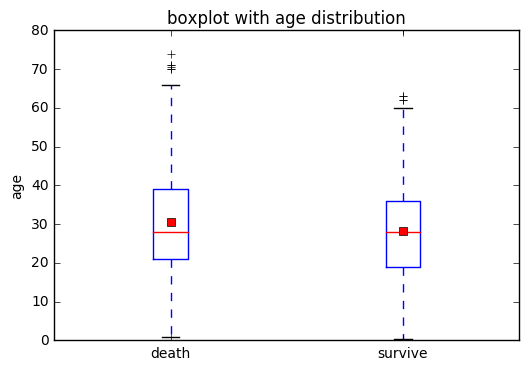

Summary of death['Fare']: 
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64 

Summary of survivor['Fare']: 
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


In [39]:
#drawing the boxplot by cleaned dataset
data2 = [death['Age'].dropna(), survivor['Age'].dropna()]

plt.title("boxplot with age distribution")
plt.ylabel("age")
plt.boxplot(data2, labels = ['death','survive']
            , showmeans = True)
plt.show()
print "Summary of death['Fare']: "
print death['Age'].dropna().describe(), "\n"
print "Summary of survivor['Fare']: "
print survivor['Age'].dropna().describe()

Several views can be conclude in this boxplot. First, most elder people older than 65-year-old died and most of baby alive, Though there are one survivor who is 80 years old. Second the average years of survivor is younger than who are dead, but it is slightly difference, only 2 years. It is not an obvious evidence to show the statement that "most of young alive".

In futher to original data, we can add independent variable 'Sex' to observed the difference between 4 category of boxplot.

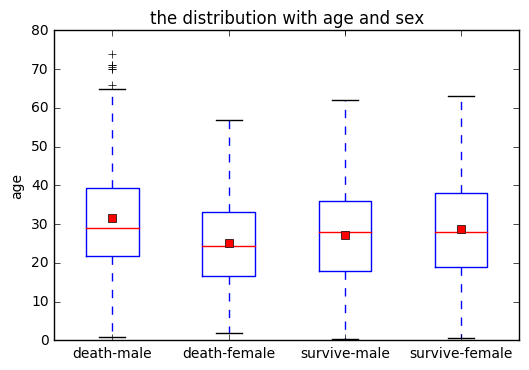

In [41]:
#drawing the boxplot by adding independent variable Sex
data2 = [death[death['Sex'] == 'male' ]['Age'].dropna(), 
         death[death['Sex'] == 'female' ]['Age'].dropna(),
         survivor[survivor['Sex'] == 'male' ]['Age'].dropna(),
        survivor[survivor['Sex'] == 'female' ]['Age'].dropna()]
plt.title("the distribution with age and sex")
plt.ylabel("age")
plt.boxplot(data2, labels = ['death-male','death-female','survive-male','survive-female']
            , showmeans = True)
plt.show()


We can observed that 
1. the number of elder dead man is more than elder female
2. the distribution of surival male and female looks similar, but the distribution of death male and female are obviously different

### Explore with Age and Fare.
We also can observed the relationship between age and fare by x-y scatter plot, but it seems meanless. by the plot below. the data are mingled well and there are no clues between when using these two vairable together.

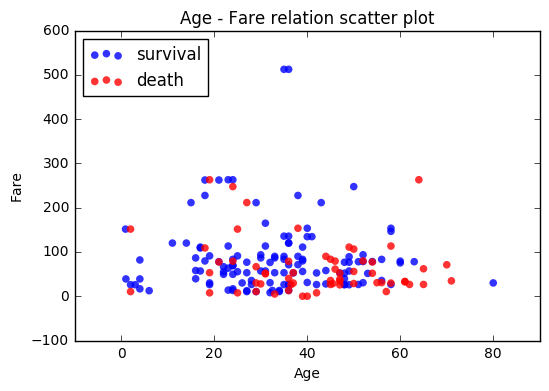

In [47]:
#drawing scatter plot

data = (survivor.dropna(), death.dropna())
colors = ("Blue", "Red")
groups = ("survival", "death") 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")

for data, color, group in zip(data, colors, groups):
    x = data['Age']
    y = data['Fare']
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.xlabel("Age")
plt.ylabel("Fare")    
plt.title('Age - Fare relation scatter plot')
plt.legend(loc=2)
plt.show()

### Conclusion

To sum up, several finding can be wrapped out in this exploration

1. By pie-chart analysis, people who have lower pclass have higher probability to survive
2. By histogram, people with higher fare have more chance to exist
3. By boxplot, almost every elder man who is older than 62-year died.

To furthur discuss, the analysis can be go through in deep by using machine learning technique. For example, using classification tree to narrow down the background info of survivor. Also, there is limitation on data cleaning part. Because I decide the clean the NaN value in the column which want to explore, the total sample number will not be the same. 